<a href="https://colab.research.google.com/github/AnanyaSharma2/data-analysis/blob/main/EntireBookSiteScrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup



In [19]:
link_of_second_page ='https://books.toscrape.com/catalogue/page-'+str(2)+'.html'
print(link_of_second_page)

https://books.toscrape.com/catalogue/page-2.html


In [32]:
data = []

for i in tqdm(range(1,51)):        # Going through each page one by one

    link = 'https://books.toscrape.com/catalogue/page-' + str(i) + '.html'     # Creating link for each page

    res = requests.get(link)                                                   # Sending Request to the link
    soup = BeautifulSoup(res.text, 'html.parser')                              # Creating a soup for that page


    for sp in soup.find_all('li', class_= 'col-xs-6 col-sm-4 col-md-3 col-lg-3'):

        img_link   = 'https://books.toscrape.com/' + sp.find('img').get('src')[3:]
        book_link  = 'https://books.toscrape.com/catalogue/' + sp.find_all('a')[-1].get('href')
        title      = sp.find_all('a')[-1].get('title')
        rating     = sp.find('p').get('class')[-1]
        price      = sp.find('p',class_ = 'price_color').text[2:]
        stock      = sp.find('p', class_ = 'instock availability').text.strip()

        data.append([title, rating, price, stock, book_link, img_link])

100%|██████████| 50/50 [00:11<00:00,  4.36it/s]


In [33]:
len(data)

1000

In [24]:
data[0]

["It's Only the Himalayas",
 'https://books.toscrape.com/its-only-the-himalayas_981/index.html',
 'https://books.toscrape.com/../media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg',
 'Two',
 '45.17',
 'In stock']

In [63]:
dataframe=pd.DataFrame(data,columns=['title','rating', 'price', 'stock', 'book_link',' img_link'])

In [64]:
dataframe.to_csv('books.csv', index = False)

In [65]:
dataframe.head(5)

,title,rating,price,stock,book_link,img_link
0,A Light in the Attic,Three,51.77,In stock,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/media/cache/2c/da/2...
1,Tipping the Velvet,One,53.74,In stock,https://books.toscrape.com/catalogue/tipping-t...,https://books.toscrape.com/media/cache/26/0c/2...
2,Soumission,One,50.10,In stock,https://books.toscrape.com/catalogue/soumissio...,https://books.toscrape.com/media/cache/3e/ef/3...
3,Sharp Objects,Four,47.82,In stock,https://books.toscrape.com/catalogue/sharp-obj...,https://books.toscrape.com/media/cache/32/51/3...
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,https://books.toscrape.com/catalogue/sapiens-a...,https://books.toscrape.com/media/cache/be/a5/b...


In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1000 non-null   object
 1   rating     1000 non-null   object
 2   price      1000 non-null   object
 3   stock      1000 non-null   object
 4   book_link  1000 non-null   object
 5    img_link  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [67]:
dataframe[dataframe.duplicated()]

,title,rating,price,stock,book_link,img_link


In [68]:
dataframe.isnull().sum()

title        0
rating       0
price        0
stock        0
book_link    0
 img_link    0
dtype: int64

In [71]:
dataframe['rating'].nunique()

5

In [84]:
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
dataframe['rating'] = dataframe['rating'].replace(rating_map)

In [85]:
dataframe.head(5)


,title,rating,price,stock,book_link,img_link
0,A Light in the Attic,3,51.77,In stock,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/media/cache/2c/da/2...
1,Tipping the Velvet,1,53.74,In stock,https://books.toscrape.com/catalogue/tipping-t...,https://books.toscrape.com/media/cache/26/0c/2...
2,Soumission,1,50.10,In stock,https://books.toscrape.com/catalogue/soumissio...,https://books.toscrape.com/media/cache/3e/ef/3...
3,Sharp Objects,4,47.82,In stock,https://books.toscrape.com/catalogue/sharp-obj...,https://books.toscrape.com/media/cache/32/51/3...
4,Sapiens: A Brief History of Humankind,5,54.23,In stock,https://books.toscrape.com/catalogue/sapiens-a...,https://books.toscrape.com/media/cache/be/a5/b...


In [94]:
x=['One', 'Three', 'Five', 'Tow', 'Four']
counts =dataframe.rating.value_counts()
counts

1    226
3    203
5    196
2    196
4    179
Name: rating, dtype: int64

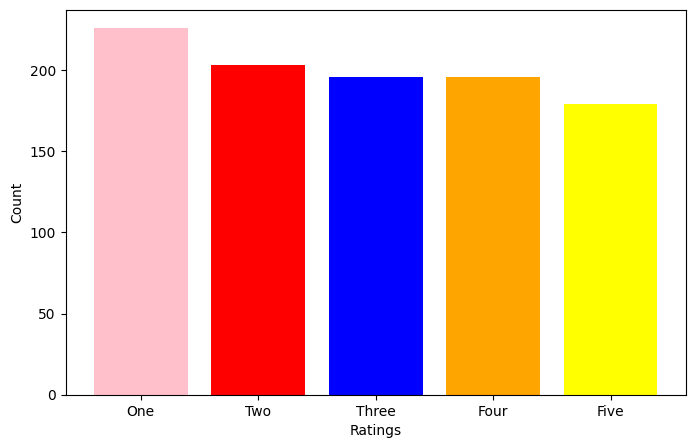

In [108]:
import matplotlib.pyplot as plt  # Ensure correct import

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
plt.bar(x, counts, color=['pink', 'red', 'blue', 'orange', 'yellow'])


# Add axis labels
plt.xlabel('Ratings')
plt.ylabel('Count')

# Show plot
plt.show()



In [110]:
dataframe['price'].nunique()

903

In [115]:
dataframe[dataframe['price']==dataframe['price'].max()]

,title,rating,price,stock,book_link,img_link
648,The Perfect Play (Play by Play #1),3,59.99,In stock,https://books.toscrape.com/catalogue/the-perfe...,https://books.toscrape.com/media/cache/40/16/4...


In [112]:
dataframe['price'].min()

'10.00'

In [116]:
dataframe[dataframe['price']==dataframe['price'].min()]

,title,rating,price,stock,book_link,img_link
638,An Abundance of Katherines,5,10.00,In stock,https://books.toscrape.com/catalogue/an-abunda...,https://books.toscrape.com/media/cache/ed/45/e...


In [132]:
dataframe['price'] = dataframe['price'].astype(float)

In [133]:
print(dataframe['price'].sum())
print(len(dataframe))

35070.35
1000


In [135]:
average_price = dataframe['price'].sum()/len(dataframe)
print(average_price)


35.07035
